In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('./dataset/train.csv')
test = pd.read_csv('./dataset/test.csv')

In [3]:
train.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
test.head()

,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,2,What but is the best way to send money from Ch...,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?


In [5]:
print(train.shape)
print(test.shape)

(404290, 6)
(2345796, 3)


In [23]:
print(len(train.question1.unique()))
print(len(train.question2.unique()))
print(len(test.question1.unique()))
print(len(test.question2.unique()))

290457
299175
2211009
2227400


In [34]:
train_q1_lens = train.question1.apply(lambda x: len(str(x)))
train_q2_lens = train.question2.apply(lambda x: len(str(x)))
test_q1_lens = test.question1.apply(lambda x: len(str(x)))
test_q2_lens = test.question2.apply(lambda x: len(str(x)))

train_q1_words = train.question1.apply(lambda x: len(str(x).split()))
train_q2_words = train.question2.apply(lambda x: len(str(x).split()))
test_q1_words = test.question1.apply(lambda x: len(str(x).split()))
test_q2_words = test.question2.apply(lambda x: len(str(x).split()))

In [31]:
df_train_desc = pd.DataFrame(index=train_q1_lens.describe().index)
df_train_desc['q1(char)'] = train_q1_lens.describe().astype(int)
df_train_desc['q2(char)'] = train_q2_lens.describe().astype(int)
df_train_desc['q1(word)'] = train_q1_words.describe().astype(int)
df_train_desc['q2(word)'] = train_q2_words.describe().astype(int)

In [32]:
df_train_desc

,q1(char),q2(char),q1(word),q2(word)
count,404290,404290,404290,404290
mean,59,60,10,11
std,29,33,5,6
min,1,1,1,1
25%,39,39,7,7
50%,52,51,10,10
75%,72,72,13,13
max,623,1169,125,237


In [35]:
df_test_desc = pd.DataFrame(index=test_q1_lens.describe().index)
df_test_desc['q1(char)'] = test_q1_lens.describe().astype(int)
df_test_desc['q2(char)'] = test_q2_lens.describe().astype(int)
df_test_desc['q1(word)'] = test_q1_words.describe().astype(int)
df_test_desc['q2(word)'] = test_q2_words.describe().astype(int)

In [36]:
df_test_desc

,q1(char),q2(char),q1(word),q2(word)
count,2345796,2345796,2345796,2345796
mean,60,60,11,11
std,31,31,5,5
min,1,1,1,1
25%,40,39,7,7
50%,53,52,10,10
75%,72,72,13,13
max,1172,1176,238,238


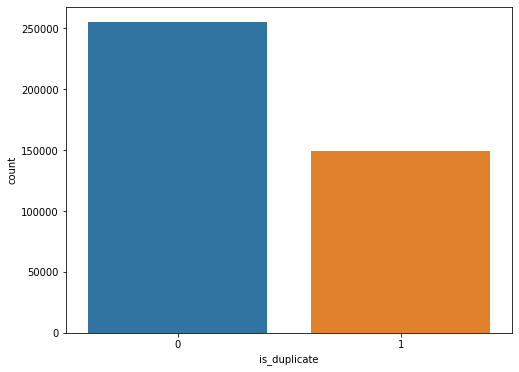

In [44]:
plt.figure(figsize=(8,6))
sns.countplot(train.is_duplicate);